# Transformación y preparación de datos para entrenamiento

## Importar Librerias

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Carga y Visualización Inicial de los Datos

In [3]:
# Cargar datos
df = pd.read_csv("../data/data_labeled.csv", sep=',')

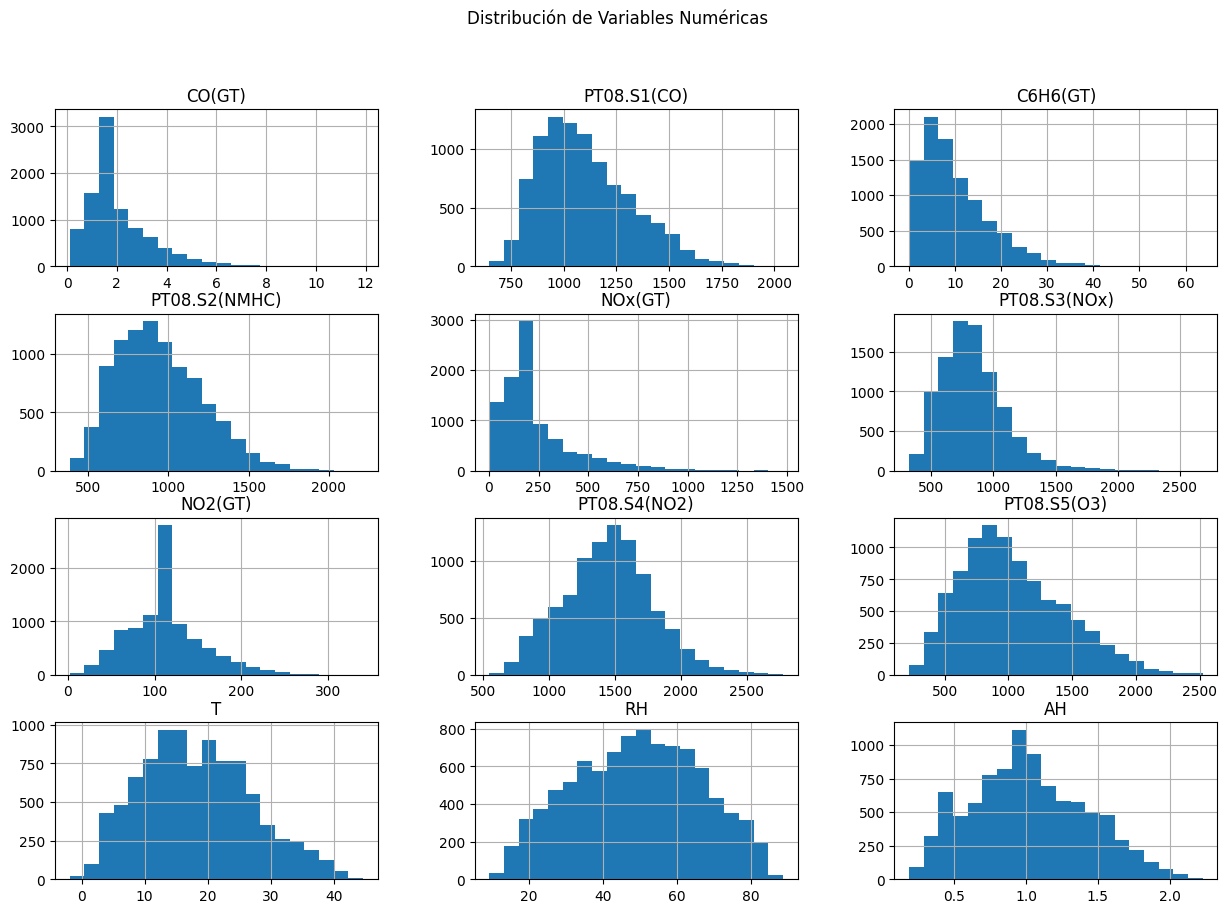

In [4]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

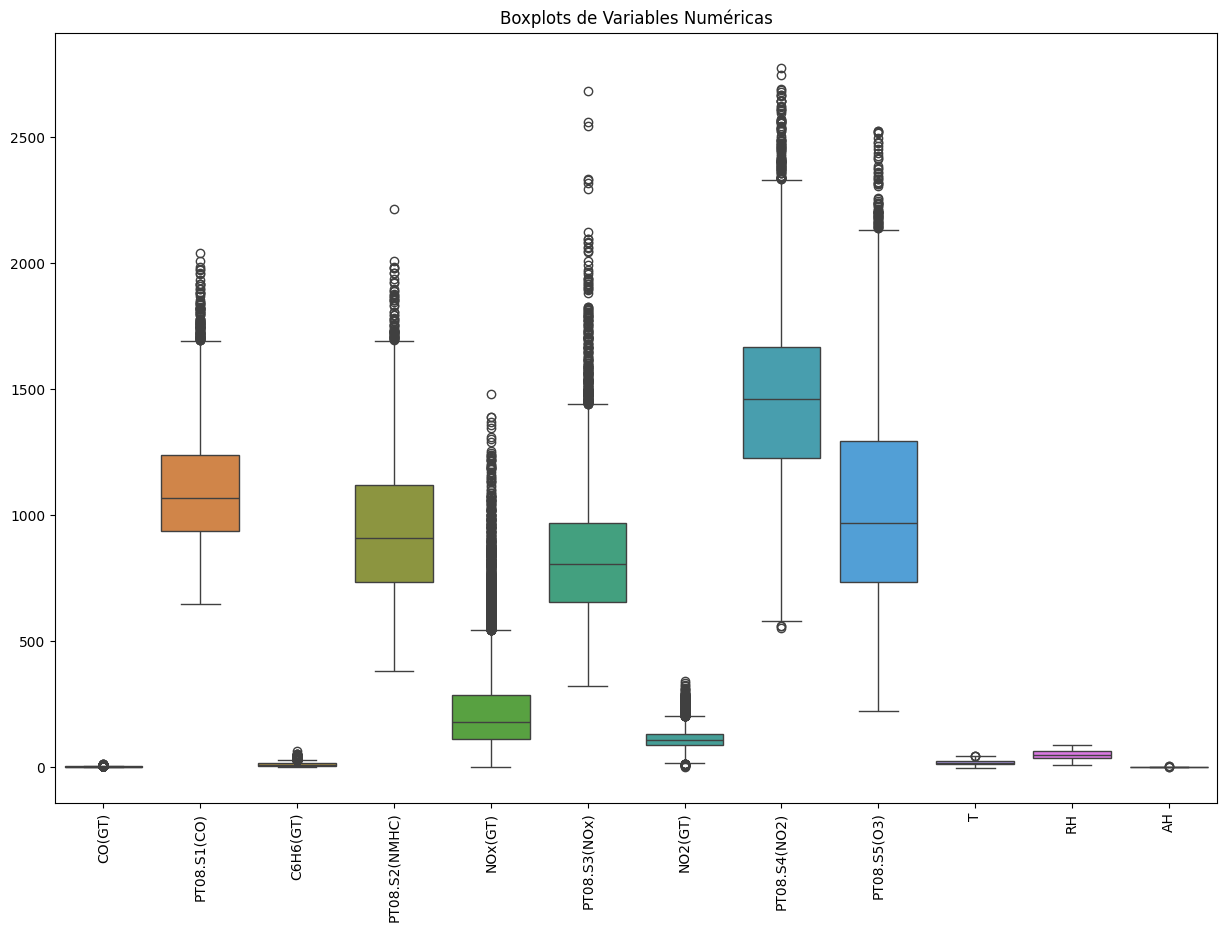

In [5]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=90)
plt.show()

## Escalar los datos

In [ ]:
# Separar características (X) y etiquetas (y), suponiendo que la columna de etiquetas es 'Riesgo'
X = df.drop(columns=['Riesgo'], errors='ignore')
y = df['Riesgo'] if 'Riesgo' in df.columns else None

# Aplicar StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un DataFrame con los datos escalados
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Añadir la columna 'Riesgo'
if y is not None:
    df_scaled['Riesgo'] = y.values

# Verificar el resultado
print(df_scaled.head())

     CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0  0.386029     1.177627  0.229342       0.387741 -0.354617      0.873072   
1 -0.067502     0.865965 -0.103840       0.048002 -0.677560      1.334557   
2  0.083675     1.370125 -0.157149      -0.011733 -0.534030      1.201587   
3  0.083675     1.250960 -0.130495       0.021868 -0.323861      1.013864   
4 -0.369856     0.774299 -0.490331      -0.396273 -0.534030      1.455795   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH    Riesgo  
0  0.014261      0.695541     0.582197 -0.527644 -0.016947 -0.651002      Alto  
1 -0.463597      0.307998    -0.149704 -0.561807 -0.086741 -0.731314  Moderado  
2  0.037016      0.296343     0.102505 -0.721236  0.279675 -0.669899      Alto  
3  0.219057      0.380845     0.421476 -0.823727  0.628642 -0.579144      Alto  
4  0.082526      0.106942     0.191520 -0.800951  0.605378 -0.573922      Alto  


## Visualizaciones depués de escalado

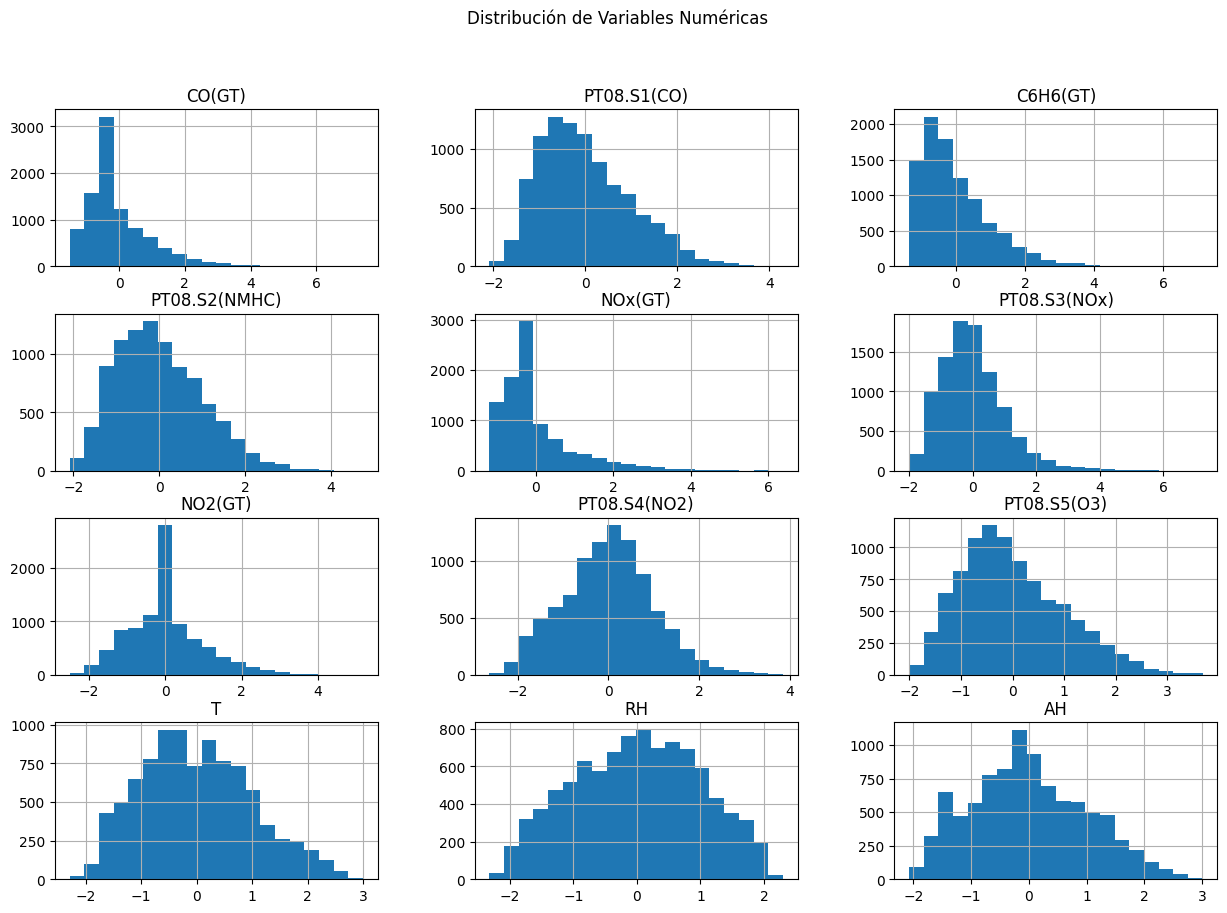

In [8]:
df_scaled.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

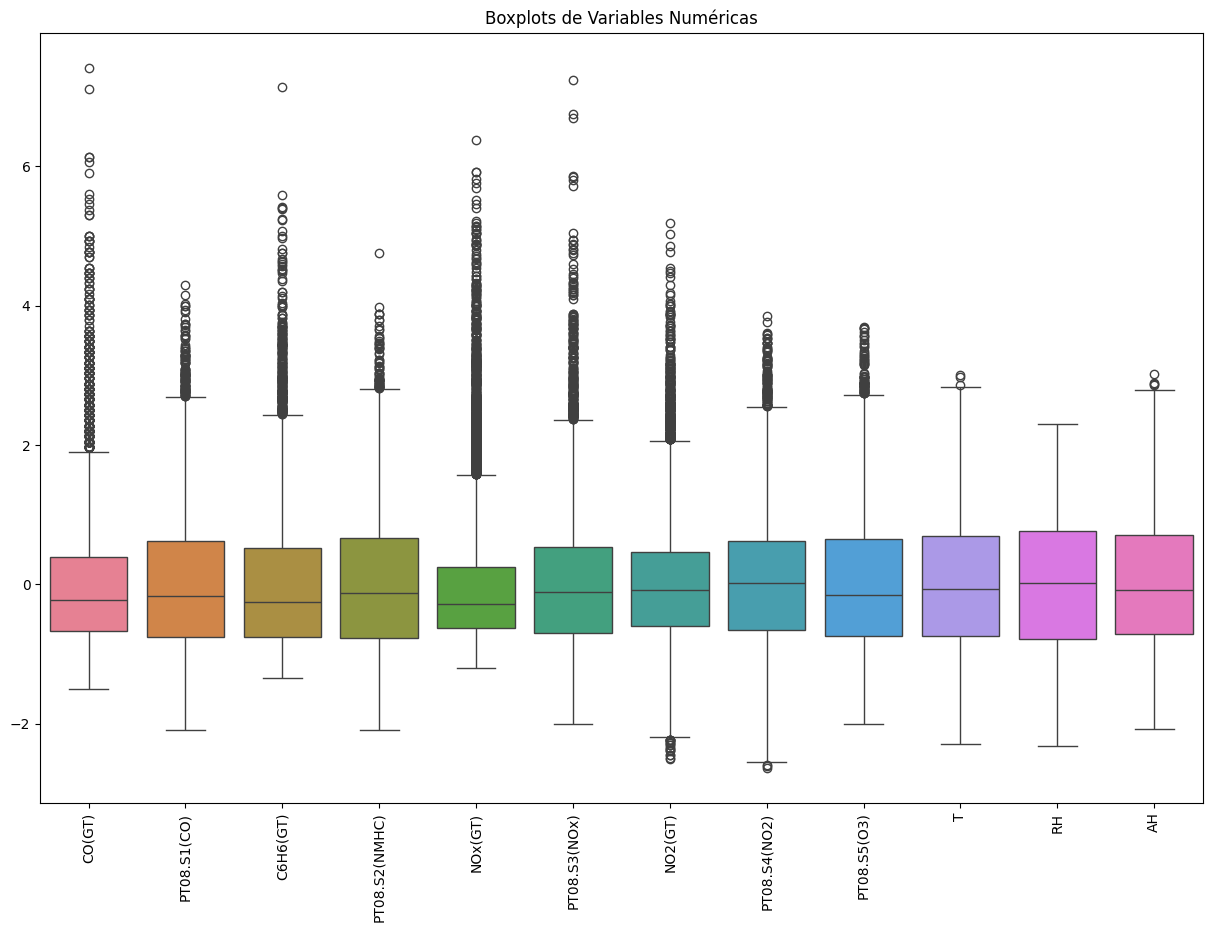

In [9]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_scaled)
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=90)
plt.show()

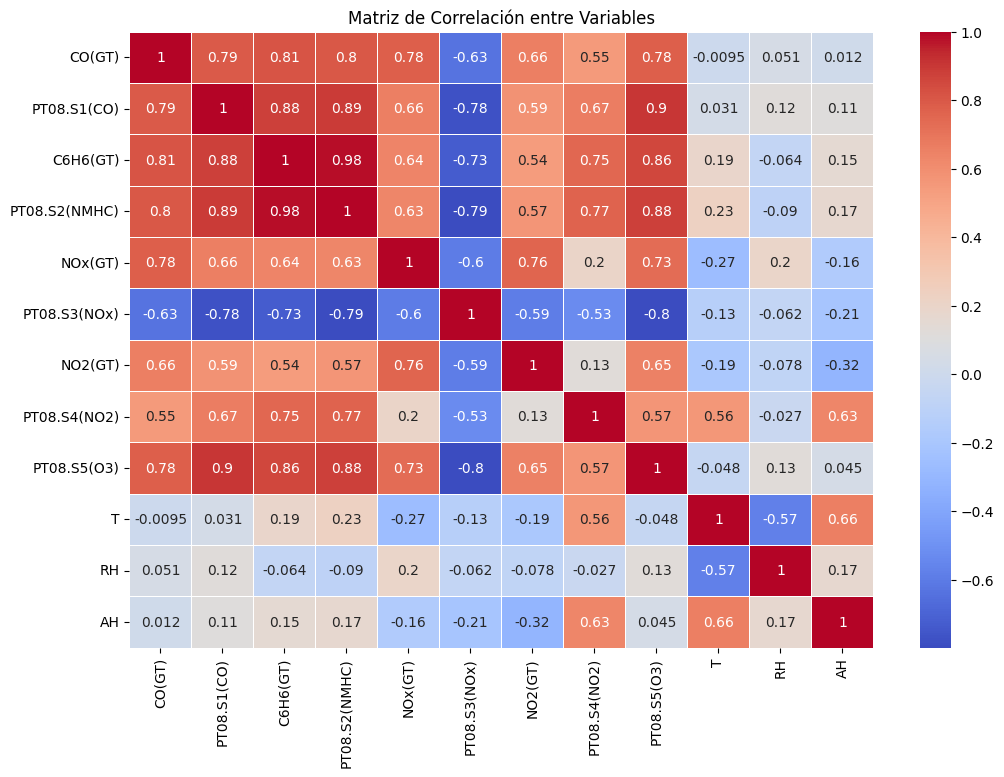

In [11]:
# Matriz de correlación sin la columna 'Date'
correlation_matrix = df_scaled.drop(columns=['Riesgo']).corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

## Exportar datos

In [14]:
df_scaled.to_csv('../data/data_scaled.csv', sep=',', index=False)